Задача
Постройте с помощью subplots графики цены для датасета aws spot prices для ОС Windows и всех архитектур вида i*. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# Загрузим данные

data = pd.read_csv('ap-northeast-1.csv', parse_dates= True)
data.head()


,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1a,1.6503
0,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1c,1.7461
1,2017-05-08 21:46:34+00:00,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2,2017-05-08 21:46:34+00:00,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
3,2017-05-08 21:46:17+00:00,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
4,2017-05-08 21:46:17+00:00,c4.8xlarge,Linux/UNIX,ap-northeast-1a,0.6890


In [4]:
# Переименуем заголовки

data.columns = ['Date', 'Architecture','OS','AWS Region Code','Price']
data

,Date,Architecture,OS,AWS Region Code,Price
0,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1c,1.7461
1,2017-05-08 21:46:34+00:00,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2,2017-05-08 21:46:34+00:00,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
3,2017-05-08 21:46:17+00:00,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
4,2017-05-08 21:46:17+00:00,c4.8xlarge,Linux/UNIX,ap-northeast-1a,0.6890
...,...,...,...,...,...
1956994,2017-03-30 07:25:16+00:00,g2.2xlarge,Windows,ap-northeast-1c,0.1183
1956995,2017-03-30 07:25:13+00:00,m4.xlarge,Windows,ap-northeast-1c,0.2394
1956996,2017-03-30 07:25:13+00:00,c3.2xlarge,SUSE Linux,ap-northeast-1c,0.1976
1956997,2017-03-30 07:25:13+00:00,c3.2xlarge,Linux/UNIX,ap-northeast-1c,0.0976


In [5]:
# Отфильтруем  по (ОС)! и архитектуре "i"

data = data[(data['OS'] == 'Windows') & (data['Architecture'].str.startswith('i'))] 
data

,Date,Architecture,OS,AWS Region Code,Price
35,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2120
36,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2120
90,2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210
174,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.2200
175,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.2200
...,...,...,...,...,...
1955643,2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198
1955723,2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195
1955791,2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164
1955842,2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162


In [6]:
# Создадим копию нашего датафрейма, чтобы поменять дату

data2 = data.copy()

In [7]:
# Проблема 1: Меняем формат дат 

data2['Date'] = [pd.to_datetime(str(date)).strftime('%Y-%m-%d') for date in data2['Date']]
data2

,Date,Architecture,OS,AWS Region Code,Price
35,2017-05-08,i2.xlarge,Windows,ap-northeast-1a,0.2120
36,2017-05-08,i2.xlarge,Windows,ap-northeast-1c,0.2120
90,2017-05-08,i2.xlarge,Windows,ap-northeast-1a,0.2210
174,2017-05-08,i3.xlarge,Windows,ap-northeast-1a,0.2200
175,2017-05-08,i3.xlarge,Windows,ap-northeast-1c,0.2200
...,...,...,...,...,...
1955643,2017-03-30,i2.xlarge,Windows,ap-northeast-1c,0.2198
1955723,2017-03-30,i2.xlarge,Windows,ap-northeast-1c,0.2195
1955791,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2164
1955842,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2162


In [15]:
# Проблема 2: Данные даны задом наперед, в датафрейме сначала "новые даты", а потом более "старые"
# Из-за этого, когда мы будем строить график, он нарисуется "в прошлое"
# Отсоритруем данные в правильном порядке
# data.sort_values('Date') # Отсоритруем данные по колонке 'Date' по возрастанию! (это новый объект)

data2 = data2.sort_values('Date') # Отсоритруем данные по колонке 'Date' по возрастанию! (здесь переменную 'Date')
data2

,Date,Architecture,OS,AWS Region Code,Price
1956356,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2157
1954380,2017-03-30,i3.xlarge,Windows,ap-northeast-1a,0.2213
1955339,2017-03-30,i2.8xlarge,Windows,ap-northeast-1a,1.8564
1933303,2017-03-30,i3.2xlarge,Windows,ap-northeast-1a,0.4448
1955791,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2164
...,...,...,...,...,...
90,2017-05-08,i2.xlarge,Windows,ap-northeast-1a,0.2210
36,2017-05-08,i2.xlarge,Windows,ap-northeast-1c,0.2120
23547,2017-05-08,i2.xlarge,Windows,ap-northeast-1c,0.2222
8303,2017-05-08,i2.2xlarge,Windows,ap-northeast-1c,0.6750


In [18]:
# Отфильтруем датафрейм по архитектурам и дате, агрегируем по макс. и мин. цене, а также сбросим индекс 

dt = data2.groupby(['Architecture','Date'], as_index = False).agg({'Price': ['min','max']}).reset_index()

dt

index Architecture        Date  Price        
                                      min     max
0       0   i2.2xlarge  2017-03-30  0.425  0.8582
1       1   i2.2xlarge  2017-03-31  0.425  0.8323
2       2   i2.2xlarge  2017-04-01  0.425  0.6750
3       3   i2.2xlarge  2017-04-02  0.425  0.7005
4       4   i2.2xlarge  2017-04-03  0.425  1.0895
..    ...          ...         ...    ...     ...
395   395    i3.xlarge  2017-05-04  0.220  0.2227
396   396    i3.xlarge  2017-05-05  0.220  0.2242
397   397    i3.xlarge  2017-05-06  0.220  0.2228
398   398    i3.xlarge  2017-05-07  0.220  0.2214
399   399    i3.xlarge  2017-05-08  0.220  0.2245

[400 rows x 5 columns]

In [19]:
# Удалим по всему датафрему первый уровень заголовков и добавим к нему мин и макс цену, которые мы нашли ранее

dt.columns = list(dt.columns.droplevel(1)[:3]) + ['Min_Price', 'Max_Price']
dt

,index,Architecture,Date,Min_Price,Max_Price
0,0,i2.2xlarge,2017-03-30,0.425,0.8582
1,1,i2.2xlarge,2017-03-31,0.425,0.8323
2,2,i2.2xlarge,2017-04-01,0.425,0.6750
3,3,i2.2xlarge,2017-04-02,0.425,0.7005
4,4,i2.2xlarge,2017-04-03,0.425,1.0895
...,...,...,...,...,...
395,395,i3.xlarge,2017-05-04,0.220,0.2227
396,396,i3.xlarge,2017-05-05,0.220,0.2242
397,397,i3.xlarge,2017-05-06,0.220,0.2228
398,398,i3.xlarge,2017-05-07,0.220,0.2214


In [13]:
# Найдем уникальные архитектуры в нашем отобранном датасете

dt['Architecture'].unique()

array(['i2.2xlarge', 'i2.4xlarge', 'i2.8xlarge', 'i2.xlarge',
       'i3.16xlarge', 'i3.2xlarge', 'i3.4xlarge', 'i3.8xlarge',
       'i3.large', 'i3.xlarge'], dtype=object)

In [23]:
# Создадим отдельные датасеты по архитектурам 

i2_xlarge = dt[dt['Architecture'] == 'i2.xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i2_8xlarge = dt[dt['Architecture'] == 'i2.8xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i3_xlarge = dt[dt['Architecture'] == 'i3.xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i3_2xlarge = dt[dt['Architecture'] == 'i3.2xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i3_4xlarge = dt[dt['Architecture'] == 'i3.4xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i3_large = dt[dt['Architecture'] == 'i3.large'][['Date', 'Min_Price', 'Max_Price']].dropna()
i2_4xlarge = dt[dt['Architecture'] == 'i2.4xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i3_8xlarge = dt[dt['Architecture'] == 'i3.8xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i2_2xlarge = dt[dt['Architecture'] == 'i2.2xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()
i3_16xlarge = dt[dt['Architecture'] == 'i3.16xlarge'][['Date', 'Min_Price', 'Max_Price']].dropna()


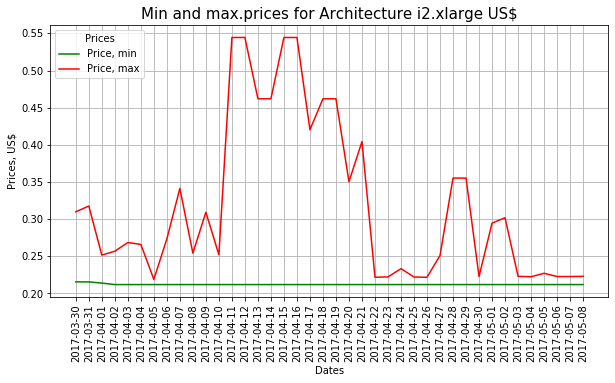

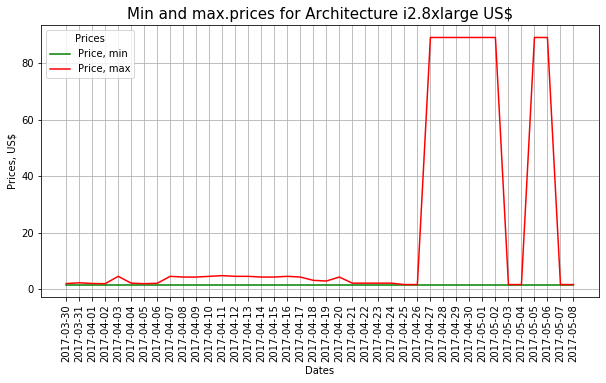

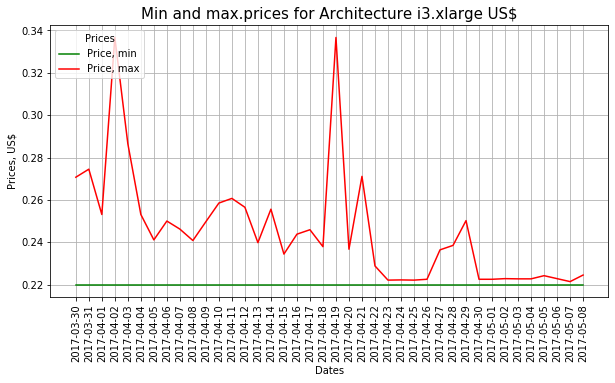

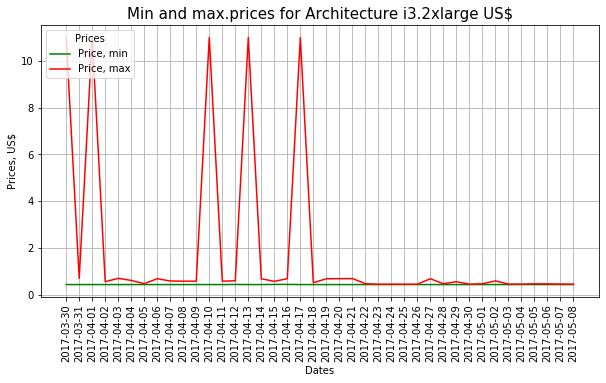

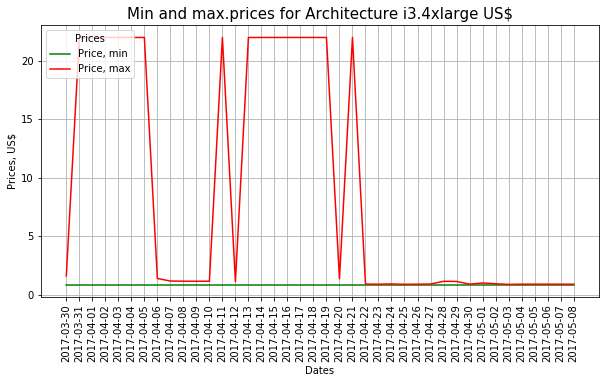

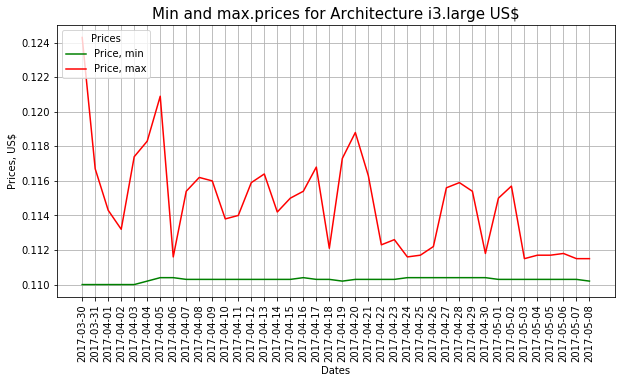

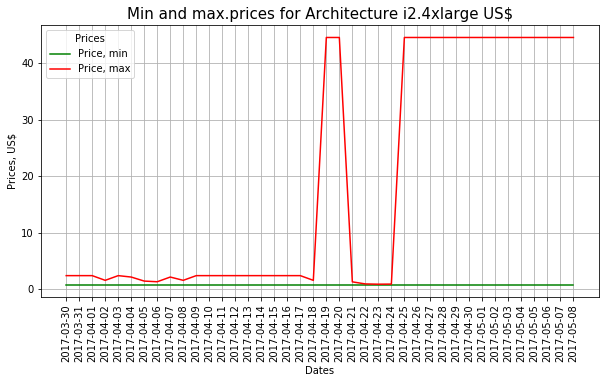

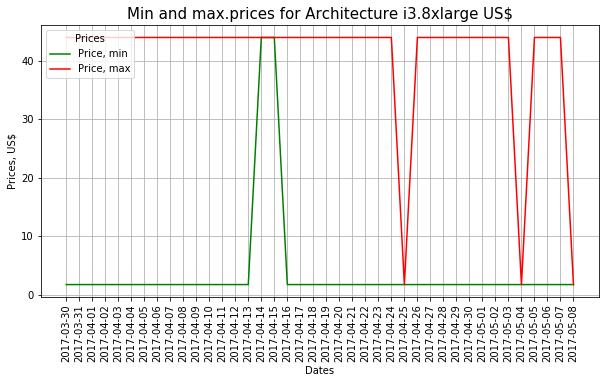

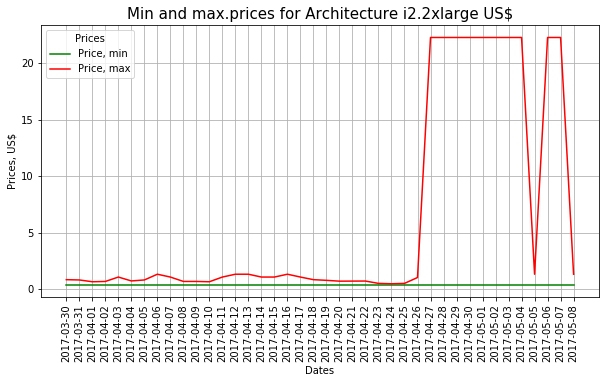

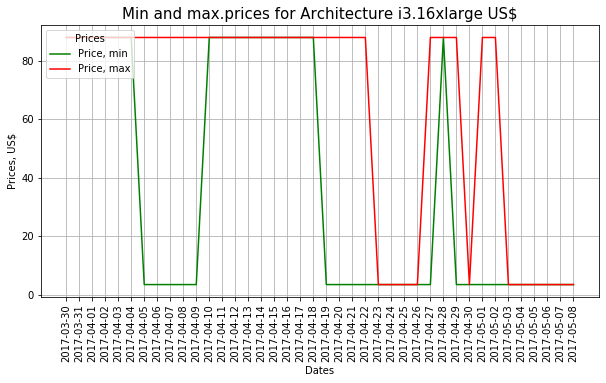

In [25]:
# напишем функцию для построения графиков

def plot_architecture(data, architecture):
    fig, subplot = plt.subplots(figsize=(10,5))

    subplot.plot(data['Date'], data['Min_Price']
                 , label='Price, min'
                 , color='g')
    subplot.plot(data['Date'], data['Max_Price']
                 , label='Price, max'
                 , color='r')
    plt.xticks(rotation='vertical')                 
    plt.title('Min and max.prices for Architecture ' + architecture + ' US$', size=15)
    subplot.set_xlabel('Dates')
    subplot.set_ylabel('Prices, US$')
    subplot.grid()
    subplot.legend(loc='upper left', title='Prices')
    
plot_architecture(i2_xlarge, 'i2.xlarge')
plot_architecture(i2_8xlarge, 'i2.8xlarge')
plot_architecture(i3_xlarge, 'i3.xlarge')
plot_architecture(i3_2xlarge, 'i3.2xlarge')
plot_architecture(i3_4xlarge, 'i3.4xlarge')
plot_architecture(i3_large, 'i3.large')    
plot_architecture(i2_4xlarge, 'i2.4xlarge')  
plot_architecture(i3_8xlarge, 'i3.8xlarge') 
plot_architecture(i2_2xlarge, 'i2.2xlarge') 
plot_architecture(i3_16xlarge, 'i3.16xlarge') 